# SVM Classifier (Color Extraction)

## Initiation

https://github.com/tsunghao-huang/SVM-Fruit-Image-Classifier/blob/master/main.py
http://localhost:8888/notebooks/RTC:Downloads/Shanmukh_Classification.ipynb

In [2]:
import os
import cv2
import imutils
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

In [3]:
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [19]:
# datadir= r"C:\\Users\SMSK_Narinda\Desktop\Research\dataset" 

# # Testing train data
datadir= r"C:\Users\SMSK_Narinda\Desktop\Research\data_split_augmented\test"

In [20]:
Categories=[]
img_size = 100

In [21]:
subfolders= [os.path.join(datadir, d) for d in os.listdir(datadir) if os.path.isdir(os.path.join(datadir, d))]

In [22]:
for label in os.listdir(datadir):
    Categories.append(label)

print(Categories)

['Acne_and_Rosacea_Photos', 'Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions', 'Atopic_Dermatitis_Photos', 'Bullous_Disease_Photos', 'Cellulitis_Impetigo_and_other_Bacterial_Infections', 'Eczema_Photos', 'Exanthems_and_Drug_Eruptions', 'Hair_Loss_Photos_Alopecia_and_other _Hair_Diseases', 'Herpes_HPV_other_STDs_Photos', 'Light_Diseases_and_Disorders_of_Pigmentation', 'Lupus_and_other_Connective_Tissue_diseases', 'Melanoma_Skin_Cancer_Nevi_and_Moles', 'Nail_Fungus_and_other_Nail_Disease', 'Poison_Ivy_Photos_and_other_Contact_Dermatitis', 'Psoriasis_pictures_Lichen_Planus_and_related_diseases', 'Scabies_Lyme_Disease_and_other_Infestations_and_Bites', 'Seborrheic_Keratoses_and_other_Benign_Tumors', 'Systemic_Disease', 'Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections', 'Urticaria_Hives', 'Vascular_Tumors', 'Vasculitis_Photos', 'Warts_Molluscum_and_other_Viral_Infections']


In [28]:
label_to_index = {category_name: index for index, category_name in enumerate(Categories)}
print(label_to_index)

{'Acne_and_Rosacea_Photos': 0, 'Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions': 1, 'Atopic_Dermatitis_Photos': 2, 'Bullous_Disease_Photos': 3, 'Cellulitis_Impetigo_and_other_Bacterial_Infections': 4, 'Eczema_Photos': 5, 'Exanthems_and_Drug_Eruptions': 6, 'Hair_Loss_Photos_Alopecia_and_other _Hair_Diseases': 7, 'Herpes_HPV_other_STDs_Photos': 8, 'Light_Diseases_and_Disorders_of_Pigmentation': 9, 'Lupus_and_other_Connective_Tissue_diseases': 10, 'Melanoma_Skin_Cancer_Nevi_and_Moles': 11, 'Nail_Fungus_and_other_Nail_Disease': 12, 'Poison_Ivy_Photos_and_other_Contact_Dermatitis': 13, 'Psoriasis_pictures_Lichen_Planus_and_related_diseases': 14, 'Scabies_Lyme_Disease_and_other_Infestations_and_Bites': 15, 'Seborrheic_Keratoses_and_other_Benign_Tumors': 16, 'Systemic_Disease': 17, 'Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections': 18, 'Urticaria_Hives': 19, 'Vascular_Tumors': 20, 'Vasculitis_Photos': 21, 'Warts_Molluscum_and_other_Viral_Infections': 22}


## Preprocessing

Deteksi kulit manusia menggunakan RGB dan HSV https://openlibrarypublications.telkomuniversity.ac.id/index.php/engineering/article/view/14296/14080

In [61]:
def extract_color_histogram(image, bins=(32,32,32)):
    ###extract 3d color
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0,1,2], None, bins,
                       [0, 180, 0 , 256, 0, 256])
    
    ### handle normalizing the historigram
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    
    else :
        cv2.normalize(hist,hist)
        
    return hist.flatten()

In [62]:
features = []
labels = []
flat_data_arr=[]
target_arr=[]

In [63]:
for i in range (1,2):
    print("[INFO] ITERATION", i)
    for classes in subfolders:
        # Get the label (category name) from the subfolder
        label = classes.split(os.path.sep)[-1]
        print("Processing for label " + label)

        # Iterate over the images in the current subfolder        
        for filename in os.scandir(classes):
            if filename.is_file():
                # Get the path of the image file
                image_path = filename.path
                
                # Read and resize the image
                image = cv2.imread(image_path)
                # image = cv2.resize(image, (150, 150))
                
                # Mendapatkan label dari nama subfolder
                label = classes.split(os.path.sep)[-1]
    
                # Ekstrak fitur dari gambar dan histogram warna
                # pixels = image_2_feature_vector(image)
                hist = extract_color_histogram(image)
                
                # Append the flattened image data and numerical label to their respective lists
                flat_data_arr.append(image.flatten())
                target_arr.append(label_to_index[label])
    
                # Menambahkan fitur dan label ke dalam list yang sesuai
                # rawImages.append(pixels)
                features.append(hist.flatten())
                labels.append(label)
    print("[STOP] \n")

[INFO] ITERATION 1
Processing for label Acne_and_Rosacea_Photos
Processing for label Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions
Processing for label Atopic_Dermatitis_Photos
Processing for label Bullous_Disease_Photos
Processing for label Cellulitis_Impetigo_and_other_Bacterial_Infections
Processing for label Eczema_Photos
Processing for label Exanthems_and_Drug_Eruptions
Processing for label Hair_Loss_Photos_Alopecia_and_other _Hair_Diseases
Processing for label Herpes_HPV_other_STDs_Photos
Processing for label Light_Diseases_and_Disorders_of_Pigmentation
Processing for label Lupus_and_other_Connective_Tissue_diseases
Processing for label Melanoma_Skin_Cancer_Nevi_and_Moles
Processing for label Nail_Fungus_and_other_Nail_Disease
Processing for label Poison_Ivy_Photos_and_other_Contact_Dermatitis
Processing for label Psoriasis_pictures_Lichen_Planus_and_related_diseases
Processing for label Scabies_Lyme_Disease_and_other_Infestations_and_Bites
Processing for lab

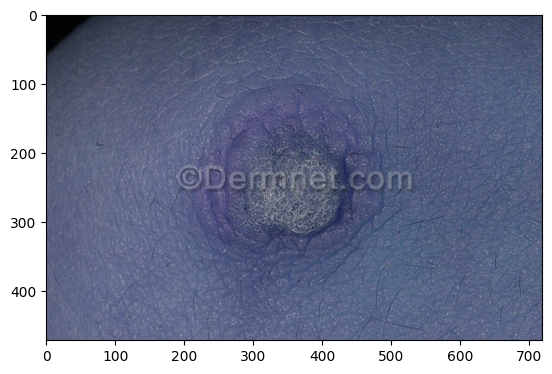

In [64]:
plt.imshow(image)

In [65]:
print("[INFO] Processed {}/{}".format(len(labels), len(subfolders)))

[INFO] Processed 7488/23


In [66]:
# rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)

In [67]:
print("[INFO] features matrix: {:.2f} MB".format(
	features.nbytes / (1024 * 1000.0)))
print("[INFO] labels matrix: {:.2f} MB".format(
	labels.nbytes / (1024 * 1000.0)))
print("features shape ", features.shape)
print("labels shape ", labels.shape)

[INFO] features matrix: 958.46 MB
[INFO] labels matrix: 1.93 MB
features shape  (7488, 32768)
labels shape  (7488,)


In [15]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

In [16]:
print("[INFO] flat_data matrix: {:.2f} MB".format(
	flat_data.nbytes / (1024 * 1000.0)))
print("[INFO] target matrix: {:.2f} MB".format(
	target.nbytes / (1024 * 1000.0)))
print("flat_data shape ", flat_data.shape)
print("target shape ", target.shape)

[INFO] flat_data matrix: 493.59 MB
[INFO] target matrix: 0.03 MB
flat_data shape  (7488, 67500)
target shape  (7488,)


In [17]:
df=pd.DataFrame(flat_data)

In [18]:
df['Target']=target

In [19]:
df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
          67491,    67492,    67493,    67494,    67495,    67496,    67497,
          67498,    67499, 'Target'],
      dtype='object', length=67501)

In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
print("[INFO] x shape ", x.shape)
print("[INFO] y shape ", y.shape)

[INFO] x shape  (7488, 67500)
[INFO] y shape  (7488,)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,test_size=0.30,random_state=42,stratify=y)

print('Splitted Successfully')

Splitted Successfully


DASAR svm
https://stackoverflow.com/questions/19634531/support-vector-machine-algorithm-for-image-classification

#### cara 1

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [24]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = clf.fit(x, y)

In [25]:
prediction = clf.predict(x_test)
print(clf.predict(x_test))

[11 12 12 ... 14 14 17]


In [ ]:
%timeit clf.fit(x, y)

In [ ]:
prediction = clf.predict(x_test)

In [26]:
accuracy_score(y_test, prediction)

0.792167334223409

#### cara #2

In [23]:
# Define SVM model
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [24]:
prediction = clf.predict(x_test)
print(clf.predict(x_test))

[11 12 12 ...  2 14 17]


In [25]:
accuracy_score(y_test, prediction)

0.7120605251446372

#### cara #3

linearSVC
linearSVR (regrsi
NuSVC
NuSVR (regresi
OneClassSVM
SVC
SVR (regresi
l1_min_c
hasi; linear aja = 1.00
tapi kita ulang lagi pake x_train dkk

In [34]:
clf = SVC(kernel='linear')
clf = clf.fit(x_train, y_train)

In [35]:
prediction = clf.predict(x_test)
print(clf.predict(x_test))

[11 12 12 ...  2 14 17]


In [36]:
accuracy_score(y_test, prediction)

0.6582109479305741

#### cara #4
linearSVC dan SVC Linear 
https://scikit-learn.org/stable/modules/svm.html
https://stackoverflow.com/questions/76801704/implementing-image-classification-using-svm

In [27]:
clf = SVC(kernel='linear', C=1e6).fit(x, y)

In [28]:
prediction = clf.predict(x_test)
print(clf.predict(x_test))

[11 12  5 ...  2 14 17]


In [29]:
accuracy_score(y_test, prediction)

1.0

In [ ]:
clf = SVC(kernel='linear', C=1e6).fit(x_train, y_train)

In [ ]:
prediction = clf.predict(x_test)
print(prediction)

In [ ]:
accuracy_score(y_test, prediction)

##### modif part 2

In [37]:
clf =svm.LinearSVC()
clf.fit(x_train, y_train)

C:\Users\SMSK_Narinda\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\SMSK_Narinda\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [38]:
predictions = clf.predict(x_test)
print(predictions)

[11 12 12 ...  2 14 17]


In [39]:
accuracy_score(y_test, predictions)

0.645749888740543

#### cara #5
LinearSVR (regression)

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

svr = LinearSVR(dual=True)
param_grid = {'epsilon': [0.], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
tunedSVR = GridSearchCV(cv=3, estimator=svr, scoring='neg_mean_absolute_error', param_grid=param_grid)
scaledAndTunedSVR = make_pipeline(StandardScaler(), tunedSVR)
regressor = MultiOutputRegressor(scaledAndTunedSVR)

In [23]:
from sklearn.svm import LinearSVR
clf = LinearSVR(max_iter=10000, dual=True)
clf = clf.fit(x, y)

C:\Users\SMSK_Narinda\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
prediction = clf.predict(x_test)
print(clf.predict(x_test))

[10.84690316 11.88672844  4.89000288 ...  1.88947303 13.94385567
 16.97537531]


##### Ini pake Linear SVR tanpa iteration

In [25]:
print("Type of y_test:", type(y_test))
print("Type of prediction:", type(prediction))

print("Sample values from y_test:", y_test[:5])
print("Sample values from prediction:", prediction[:5])

Type of y_test: <class 'pandas.core.series.Series'>
Type of prediction: <class 'numpy.ndarray'>
Sample values from y_test: 3792    11
3948    12
1926     5
5657    17
308      0
Name: Target, dtype: int32
Sample values from prediction: [10.84690316 11.88672844  4.89000288 16.85195779 -0.12522919]


In [26]:
# Convert predictions to the nearest integer class labels
predicted_classes = np.round(prediction).astype(int)

In [28]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in predicted_classes:", np.unique(predicted_classes))

Unique values in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Unique values in predicted_classes: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23]


In [27]:
acc = accuracy_score(y_test, predicted_classes)
print(acc)

0.936359590565198


#### cara #5
nuSVC

In [60]:
clf = svm.SVC(decision_function_shape='ovo')
clf = clf.fit(x, y)

In [61]:
prediction = clf.predict(x_test)
print(clf.predict(x_test))

[11 12 12 ... 14 14 17]


In [62]:
accuracy_score(y_test, prediction)

0.7378727191811304

#### cara #6

one class SVM

https://www.google.com/search?q=OneClassSVMcode+image+classification&sca_esv=db699bbe45cbe8a4&sca_upv=1&rlz=1C1ONGR_enID1096ID1096&sxsrf=ADLYWILTK_V08YGq_F34-WkmR9_Rs2C5DQ%3A1718953483851&ei=CyZ1ZszOM6fC4-EPmMms2A0&ved=0ahUKEwiMgKnekOyGAxUn4TgGHZgkC9sQ4dUDCBA&uact=5&oq=OneClassSVMcode+image+classification&gs_lp=Egxnd3Mtd2l6LXNlcnAiJE9uZUNsYXNzU1ZNY29kZSBpbWFnZSBjbGFzc2lmaWNhdGlvbjIKECEYoAEYwwQYCjIKECEYoAEYwwQYCkjAJFChCFigInADeAGQAQCYAagBoAGiCqoBAzQuOLgBA8gBAPgBAZgCDqACzwnCAgoQABiwAxjWBBhHwgIGEAAYDRgewgIIEAAYBRgNGB7CAggQABgIGA0YHsICCBAhGKABGMMEwgIIEAAYgAQYogSYAwCIBgGQBgiSBwM3LjegB4cv&sclient=gws-wiz-serp

https://medium.com/squad-engineering/one-class-classification-for-images-with-deep-features-69182fb4c9c5

In [63]:
clf = svm.OneClassSVM(gamma=0.001, kernel='rbf', nu=0.08)
clf = clf.fit(x,y)

In [ ]:
prediction = clf.predict(x_test)
print(clf.predict(x_test))

In [ ]:
accuracy_score(y_test, prediction)

#### Cara #7

SVC kernel SVM
https://github.com/BenJamesbabala/Image_Classification_with_5_methods/blob/master/src_code/method1/test.py

In [ ]:
model = SVC(max_iter=1000,class_weight='balanced')
model.fit(x_train,y_train)

In [ ]:
prediction = model.predict(x_test)
print(prediction)

In [ ]:
accuracy_score(y_test, prediction)

# Testing

## Save Model

In [30]:
print(acc)

0.936359590565198


In [ ]:
pickle.dump(clf ,open('SVMClassifier.p','wb'))
print("[INFO] Model is saved successfully")

## Save Model

In [6]:
# Load model
model = pickle.load(open('C:\\Users\\SMSK_Narinda\\Desktop\\Skripsi_Checkpoint_KNN_SVM_Dermnet\\Model\\SVM_71_Classifier.p', 'rb'))

In [7]:
# Input example image
# Source contoh gambar : "C:\Users\SMSK_Narinda\Downloads\089056200_1612266979-Melanoma.jpg"
# https://www.klikdokter.com/info-sehat/kanker/perbedaan-kanker-kulit-melanoma-dan-karsinoma

path = input('Enter URL of Image')

Enter URL of Image C:\Users\SMSK_Narinda\Downloads\089056200_1612266979-Melanoma.jpg


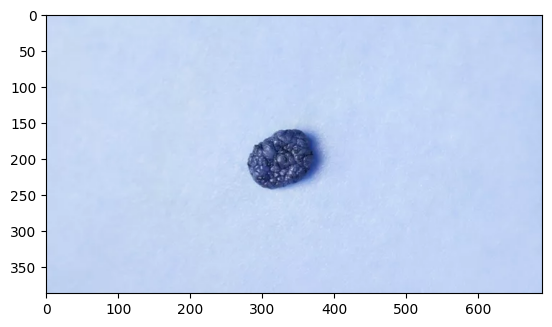

In [8]:
img_show = cv2.imread(path)
img = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

In [9]:
print("Image size is ", img.size)
print("Image shape is ", img.shape)

Image size is  801090
Image shape is  (387, 690, 3)


In [10]:
img = cv2.imread(path)
img = cv2.resize(img, (150, 150))
img = img.flatten()
print(img)

# Mendapatkan label dari nama subfolder
img_name = path.split(os.path.sep)[-1]
print(img_name)

[199 214 244 ... 186 206 241]
089056200_1612266979-Melanoma.jpg


In [11]:
print("[INFO] Test Image Feature matrix: {:.2f} MB".format(
	img.nbytes / (1024 * 1000.0)))
print("[INFO] Test Image Feature shape ", img.shape)

[INFO] Test Image Feature matrix: 0.07 MB
[INFO] Test Image Feature shape  (67500,)


In [12]:
test_image = np.array(img)

In [13]:
df=pd.DataFrame(test_image)

In [14]:
probability = model.predict(test_image.reshape(1, -1))

In [15]:
predictions = model.predict(test_image.reshape(1, -1))

In [16]:
print(predictions)

[8]


In [23]:
def transform_labels(labels):
    label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
    return np.array([label_mapping[label] for label in labels]), label_mapping

def inverse_transform_labels(predictions, label_mapping):
    inverse_mapping = {v: k for k, v in label_mapping.items()}
    return np.array([inverse_mapping[int(round(pred))] for pred in predictions])

# Transformasi label
labels_train_transformed, label_mapping = transform_labels(Categories)


In [24]:
# Transformasi kembali prediksi ke label kelas asli
predicted_labels = inverse_transform_labels(predictions, label_mapping)
print(predicted_labels)

['Herpes_HPV_other_STDs_Photos']


## Excel Dump

In [ ]:
import xlsxwriter

workbook = xlsxwriter.Workbook(r"C:\Users\SMSK_Narinda\Desktop\test_hasil.xlsx")
worksheet = workbook.add_worksheet()

worksheet.write_column(1, 1, Categories)

workbook.close()